# Assignment 4: Classification

In this assignment, you'll be working with various classifiers. The two-dimensional, two-classes datasets are small since the goal is to gain intuition over how they work. In practice, datasets have many more dimensions and may involve more classes, making visualization of a classifier's decision boundary more difficult.

Turn in your filled-out version of this Jupyter Notebook file.

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

## Helper Functions

In [52]:
def plot_points(X, y):
    cm = ListedColormap(['blue', 'orange'])
    plt.plot(X, y)
    

In [53]:
def plot_DB_and_test_data(model, X_train, X_test, y_test):
    '''
    This function will plot the decision boundary
    for a given model trained on the training data (X_train)
    against the test data (X_test, y_test)
    '''
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                             np.arange(y_min, y_max, 0.02))
    
    cm = ListedColormap(['royalblue', 'moccasin'])
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape) 
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.8);
    plt.title('Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    
    plot_points(X_test, y_test)
        
    plt.show();

## Dataset: Blobs

Split the dataset into a training and test set with a 80/20 split, respectively, and plot the training data. (Hint: you can use sklearn's `train_test_split`).

`X` is a `(n x 2)` matrix where `X[i]` is a data point defined by two arbitrary features.

`y` is a `n`-dimensional vector, representing the labels of each data point and can either be 0 or 1. Plot data points of class 0 as one color (e.g. orange) and of class 1 as another color (e.g. blue)

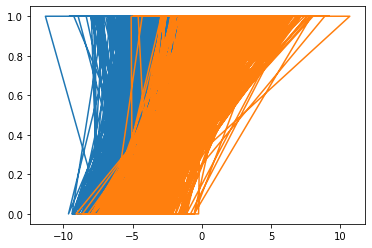

In [56]:
B = np.load('blobs.npy')
X = B[:,:2]
y = B[:,2]

def splitAndPlot(X, y):
    # Split the data with 80/20 between training and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Plot the training data
    plot_points(X_train, y_train)
    #plt.plot()
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = splitAndPlot(X,y)


For each of the following classifiers, use corresponding models from sklearn in order to fit the training data.
- Plot the fitted model's decision boundary against the test data (Hint: `plot_DB_and_test_data`)
- Print the accuracy of the model on the training and test data (Hint: sklearn's `accuracy_score`)

### Gaussian Naive Bayes

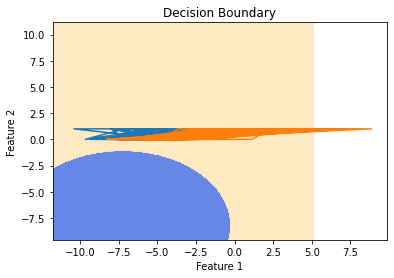

In [57]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
plot_DB_and_test_data(clf, X_train, X_test, y_test)

#clf = ... # classifier

Explain, in at most 2 sentences, how the relative covariance of the blobs affects the shape of the decision boundary.

### Decision Tree

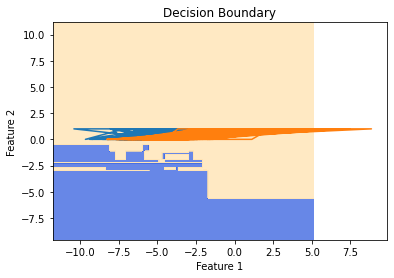

In [48]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
plot_DB_and_test_data(clf, X_train, X_test, y_test)


Explain, in at most 2 sentences, how the structure of the decision tree model affects the shape of the decision boundary.

### Linear Support Vector Machine

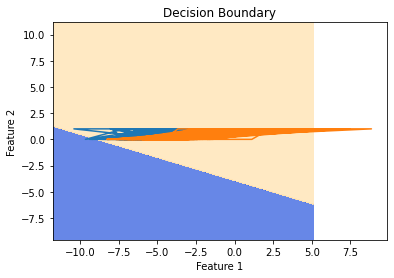

In [49]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
#X_train, y_train = make_classification(n_features=2, random_state=0)
clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
clf.fit(X_train, y_train)
plot_DB_and_test_data(clf, X_train, X_test, y_test)



### Multi-Layer Perceptron Neural Network

A neural network has many hyperparameters, such as the activation function, the number of layers/neurons it has, and number of iterations it runs for. The multilayer perceptron is one class of fully connected neural networks.

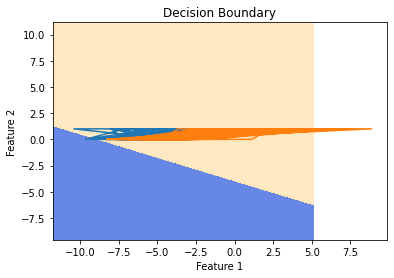

In [50]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, activation = 'identity',
                     hidden_layer_sizes=(1,), random_state=1, max_iter = 100)

clf.fit(X_train, y_train)
plot_DB_and_test_data(clf, X_train, X_test, y_test)

#clf = ...(activation='identity', hidden_layer_sizes=(1,), max_iter=100)


Run the MLP classifier with the hyperparameters above several times. How does the decision boundary differ across separate executions of the classifier over the **same training data**? Explain, in at most four sentences, what aspect of the MLP classifier causes such change and why a similar change is not observed for the linear SVM model.

What is the effect of increasing the number of iterations on the decision boundary (say to 1000 iterations)? Use the cell below to run the MLP classifier, accounting for the proper hyperparameter (relative to the original hyperparameters).

What is the effect of changing the activation function to `tanh` on the decision boundary? Use the cell below to run the MLP classifier with the hyperparameter set to `tanh`.

## Dataset: More Blobs

For each of the following classifiers, again use corresponding models from sklearn in order to fit the training data.
- Plot the fitted model's decision boundary against the test data (Hint: `plot_DB_and_test_data`)
- Print the accuracy of the model on the training and test data (Hint: sklearn's `accuracy_score`)

In [ ]:
SB = np.load('sep_blobs.npy')
X = SB[:,:2]
y = SB[:,2]

# Split the data with 80/20 between training and test

# Plot the training data
X_train, X_test, y_train, y_test = splitAndPlot(X,y)

### Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
plot_DB_and_test_data(clf, X_train, X_test, y_test)


### Decision Tree

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
plot_DB_and_test_data(clf, X_train, X_test, y_test)


### Linear Support Vector Machine

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
#X_train, y_train = make_classification(n_features=2, random_state=0)
clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
clf.fit(X_train, y_train)
plot_DB_and_test_data(clf, X_train, X_test, y_test)


### Support Vector Machine with RBF Kernel

Explain, in at most 2 sentences, how the use of an RBF kernel over linear kernel impacts the decision boundary and thus the performance of the SVM classifier.

### Multi-Layer Perceptron Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, activation = 'identity',
                     hidden_layer_sizes=(1,), random_state=1, max_iter = 100)

clf.fit(X_train, y_train)
plot_DB_and_test_data(clf, X_train, X_test, y_test)


clf = ...(activation='tanh', hidden_layer_sizes=(1,), max_iter=1500)
...

What is the effect (trend) of increasing the number of neurons (assuming a single hidden layer) on the decision boundary (say from 1 to 20 neurons)? Use the cell below to run the MLP classifier to show one example, accounting for the proper hyperparameter (relative to the original hyperparameters).

## Dataset: UF

For each of the following classifiers, again use corresponding models from sklearn in order to fit the training data.
- Plot the fitted model's decision boundary against the test data (Hint: `plot_DB_and_test_data`)
- Print the accuracy of the model on the training and test data (Hint: sklearn's `accuracy_score`)

(Dataset is courtesy of Dr. Silva)

In [ ]:
UF = np.load('UF.npy')
X = UF[:,:2]
y = UF[:,2]
X_train, X_test, y_train, y_test = splitAndPlot(X,y)

### Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
plot_DB_and_test_data(clf, X_train, X_test, y_test)


### Decision Tree

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
plot_DB_and_test_data(clf, X_train, X_test, y_test)


### Linear Support Vector Machine

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
#X_train, y_train = make_classification(n_features=2, random_state=0)
clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
clf.fit(X_train, y_train)
plot_DB_and_test_data(clf, X_train, X_test, y_test)


### Support Vector Machine with RBF Kernel

### Multi-Layer Perceptron Network

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, activation = 'identity',
                     hidden_layer_sizes=(1,), random_state=1, max_iter = 100)

clf.fit(X_train, y_train)
plot_DB_and_test_data(clf, X_train, X_test, y_test)





clf = ...(activation='tanh', hidden_layer_sizes=(20,), max_iter=2000)

...

Use the cell below to run the MLP classifier with two hidden layers. Choose the number of neurons in the first and second layer. Justify your choice by explaining the role of each layer. Use the same hyperparameters (other than the hidden layers) as above.